In [45]:
import networkx as nx  # Граф болон сүлжээний өгөгдөл боловсруулахад ашиглагдах сан
import pandas as pd  # Хүснэгтэн өгөгдлийг боловсруулах, унших, хадгалахад ашиглана
import matplotlib.pyplot as plt  # График болон дүрслэл хийхэд ашиглана
import numpy as np  # Тоон өгөгдөл боловсруулах, массивтай ажиллахад ашиглагдана

%matplotlib inline

In [46]:
def read_net_w(filename):  # CSV файлаас жингийн мэдээлэлтэй граф унших функц
    g = nx.Graph()  # NetworkX санг ашиглан хоосон граф үүсгэнэ
    with open(filename) as f:  # Файлыг унших зориулалттай нээнэ
        f.readline()  # Эхний мөрийг алгасна (ихэвчлэн толгой мөр байдаг)
        for l in f:  # Бусад мөрүүдийг нэг нэгээр нь уншина
            l = l.split(",")  # Мөрийг таслал (",") ашиглан 3 хэсэг болгон хуваана
            g.add_edge(l[0], l[1], weight=int(l[2]))  # Ирмэг (edge) нэмнэ, 3 дахь утга нь жин (weight)
    return g  # Бүрэн графыг буцаана

# Game of Thrones data ашиглах жишээ
season = 6  # 6-р улирлын өгөгдөл ашиглах
g = read_net_w(f'/content/got-s6-edges.csv')  # "Game of Thrones" цувралын 6-р улирлын сүлжээний өгөгдлийг унших

In [47]:
nx.has_bridges(g)  # Графын гүүртэй эсэхийг шалгах

True

In [48]:
list(nx.bridges(g))  # Граф дахь бүх гүүрүүдийн (тусгаарлах ирмэгүүдийн) жагсаалтыг гаргах

[('JON', 'SAM'),
 ('JON', 'JEOR'),
 ('MISSANDEI', 'KRAZNYS_MO_NAKLOZ'),
 ('TYRION', 'AERYS'),
 ('DAVOS', 'SHIREEN'),
 ('SAM', 'MAESTER_AEMON'),
 ('CERSEI', 'MOUNTAIN'),
 ('TORMUND', 'MANCE'),
 ('HOUND', 'GATINS'),
 ('BRYNDEN', 'MINISA'),
 ('EDMURE', 'HOSTER'),
 ('QYBURN', 'ARTHUR_CHILD'),
 ('NED', 'RICKARD_STARK')]

In [49]:
list(nx.local_bridges(g, with_span=True))  # Граф дахь локал гүүрүүд болон span утгуудыг гаргах

[('JON', 'SAM', inf),
 ('JON', 'JEOR', inf),
 ('MISSANDEI', 'KRAZNYS_MO_NAKLOZ', inf),
 ('TYRION', 'AERYS', inf),
 ('VARYS', 'STANNIS', 3),
 ('ARYA', 'WALDER', 3),
 ('DAVOS', 'SHIREEN', inf),
 ('SAM', 'MAESTER_AEMON', inf),
 ('CERSEI', 'MOUNTAIN', inf),
 ('TORMUND', 'MANCE', inf),
 ('HOUND', 'GATINS', inf),
 ('BRYNDEN', 'MINISA', inf),
 ('EDMURE', 'HOSTER', inf),
 ('QYBURN', 'ARTHUR_CHILD', inf),
 ('NED', 'RICKARD_STARK', inf)]

In [50]:
def node_overlap(g):  # Графын ирмэг бүрийн хөршийн давхцлыг тооцоолох функц
    for u, v in g.edges():  # Графын бүх ирмэгүүд дээр давталт хийх
        n_u = set(g.neighbors(u))  # u зангилааны хөршүүдийг set болгон авах
        n_v = set(g.neighbors(v))  # v зангилааны хөршүүдийг set болгон авах
        overlap = len(n_u & n_v) / len(n_u | n_v)  # Хөршийн давхцлын коэффициентийг тооцоолох
        g[u][v]['overlap'] = overlap  # Давхцлын утгыг ирмэгийн шинж чанар (attribute) болгон хадгалах
    return g  # Өөрчлөгдсөн графыг буцаах

In [51]:
g = node_overlap(g)  # Графын бүх ирмэгүүдийн хөршийн давхцлын коэффициентийг тооцоолох

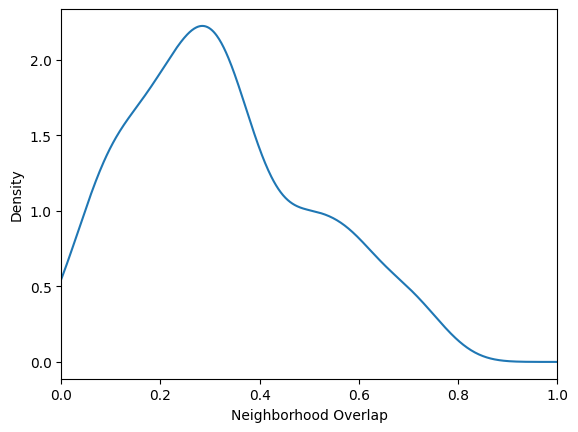

In [52]:
weights = [e[-1]['overlap'] for e in g.edges(data=True)]  # Графын бүх ирмэгийн 'overlap' утгыг жагсаалт болгон авах
pd.DataFrame(weights)[0].plot.kde()  # Хөршийн давхцлын утгуудын нягтын функц (KDE) зурах
plt.xlabel("Neighborhood Overlap")  # X тэнхлэгийн шошго нэмэх
plt.xlim(0,1)  # X тэнхлэгийн утгуудыг 0-1 хооронд хязгаарлах
plt.show()  # Графикийг харуулах

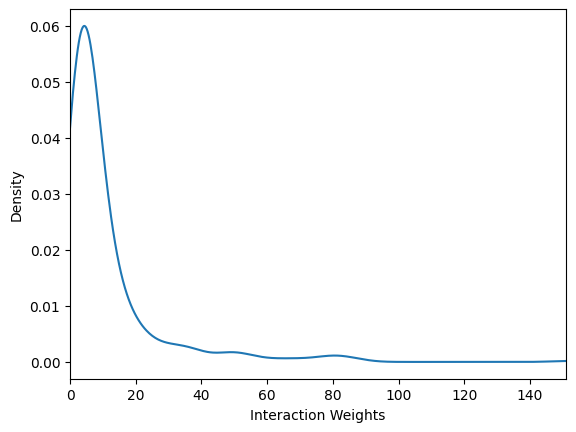

In [53]:
weights_got = [d['weight'] for u, v, d in g.edges(data=True)]  # Графын бүх ирмэгийн 'weight' утгыг жагсаалт болгон авах
pd.DataFrame(weights_got)[0].plot.kde()  # Ирмэгийн жингүүдийн нягтын функц (KDE) зурах
plt.xlabel("Interaction Weights")  # X тэнхлэгийн шошго нэмэх
plt.xlim(0, max(weights_got))  # X тэнхлэгийн утгыг 0-ээс хамгийн их жин хүртэл хязгаарлах
plt.show()  # Графикийг харуулах

In [54]:
# Random
er = nx.erdos_renyi_graph(1000, 0.001)  # Эрдөш-Рений (Erdős-Rényi) санамсаргүй граф үүсгэх (1000 зангилаа, 0.001 ирмэгийн магадлал)

# Scale-free
ba = nx.barabasi_albert_graph(1000, 2)  # Барабаши-Альберт (Barabási–Albert) масштаб-үл хамаарах граф үүсгэх (1000 зангилаа, 2 холболт)

In [55]:
er_degs = list(dict(er.degree()).values())  # Эрдөш-Рений (Erdős-Rényi) графын бүх зангилааны зэрэг (degree)-ийн утгуудыг жагсаалт болгон авах
ba_degs = list(dict(ba.degree()).values())  # Барабаши-Альберт (Barabási–Albert) графын бүх зангилааны зэрэг (degree)-ийн утгуудыг жагсаалт болгон авах

In [56]:
def molloy_reed(degrees):  # Molloy-Reed-ийн үзүүлэлтийг тооцоолох функц
    return (np.mean(degrees) * (np.mean(degrees) + 1)) / np.mean(degrees)  # Molloy-Reed индексийг тооцоолох

def breakdown_threshold(degrees):  # Сүлжээний задарлын босгыг (breakdown threshold) тооцоолох функц
    K = molloy_reed(degrees)  # Molloy-Reed индексийг олж авах
    return 1 - (1 / (K - 1))  # Задарлын босгыг тооцоолох томъёо

In [57]:
molloy_reed(er_degs)  # Эрдөш-Рений (Erdős-Rényi) графын Molloy-Reed индексийг тооцоолох

np.float64(2.012)

In [58]:
breakdown_threshold(er_degs)  # Эрдөш-Рений (Erdős-Rényi) графын задарлын босгыг (breakdown threshold) тооцоолох

np.float64(0.011857707509881465)

In [59]:
molloy_reed(ba_degs)  # Барабаши-Альберт (Barabási–Albert) графын Molloy-Reed индексийг тооцоолох

np.float64(4.992)

In [60]:
breakdown_threshold(ba_degs)  # Барабаши-Альберт (Barabási–Albert) графын задарлын босгыг (breakdown threshold) тооцоолох

np.float64(0.7494989979959921)

In [61]:
def random_node(g):  # Графаас санамсаргүй зангилаа сонгох функц
    return [np.random.choice(g.nodes())]  # Графын зангилаануудын нэгийг санамсаргүй сонгоно

def dismantle(g, function, **args):  # Графаас зангилаануудыг нэг нэгээр нь устгаж, холбогдсон хэсгүүдийн хэмжээг тооцоолох функц
    total_nodes = g.number_of_nodes()  # Граф дахь нийт зангилааны тоог авах
    removed_nodes = []  # Устгасан зангилаануудын хувь хэмжээг хадгалах жагсаалт
    components = []  # Холбогдсон хамгийн том хэсгийн хэмжээг хадгалах жагсаалт
    while len(g.nodes()) > 1:  # Графын зангилаанууд дуусах хүртэл давталт хийх
        n = function(g, **args)[0]  # Өгөгдсөн функц ашиглан устгах зангилааг сонгох
        g.remove_node(n)  # Сонгосон зангилааг графаас устгах
        removed_nodes.append((len(removed_nodes)+1)/total_nodes)  # Устгасан зангилааны хувь хэмжээг хадгалах
        comps = list(nx.connected_components(g))  # Холбогдсон хэсгүүдийг авах
        g_size = 0  # Хамгийн том холбогдсон хэсгийн хувь хэмжээг хадгалах хувьсагч
        if len(comps) > 0:  # Хэрэв холбогдсон хэсэг байвал
            g_size = max([len(c) for c in comps]) / total_nodes  # Хамгийн том хэсгийн хэмжээг нийт зангилааны тоонд харьцуулан хадгалах
        components.append(g_size)  # Үр дүнг хадгалах
    return removed_nodes, components  # Устгасан зангилааны хувь хэмжээ болон том хэсгийн хэмжээг буцаах

def get_sorted_nodes(g, score, reverse=True):  # Зангилаануудыг тодорхой үнэлгээний дагуу эрэмбэлэх функц
    nodes = score(g)  # Зангилаануудын оноог авах
    if isinstance(nodes, dict):  # Хэрэв `score` функц толь (`dict`) буцаавал
        nodes = [(k, v) for k, v in nodes.items()]  # Толь бичгийг tuple хэлбэртэй жагсаалт болгон хувиргах
    srt = sorted(nodes, key=lambda k: k[1], reverse=reverse)  # Онооны дагуу эрэмбэлэх
    return [x[0] for x in srt]  # Зөвхөн зангилааны жагсаалтыг буцаах

def plot_dismantle(x, y):  # Графын задралын процессыг дүрслэх функц
    plt.plot(x, y)  # Устгасан зангилаанууд болон том холбогдсон хэсгийн хэмжээг графикаар дүрслэх
    plt.xlabel("Removed Nodes")  # X тэнхлэгийн нэрийг тодорхойлох
    plt.ylabel("Giant Component size")  # Y тэнхлэгийн нэрийг тодорхойлох
    plt.show()  # Графикийг харуулах

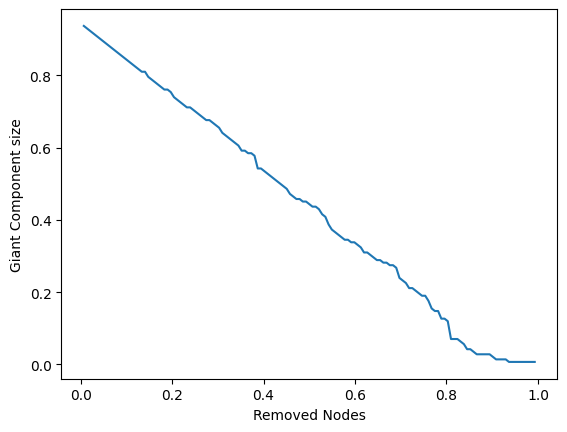

In [62]:
h = g.copy()  # Анхны графын хуулбарыг үүсгэх (эх графыг өөрчлөхгүй байлгахын тулд)
rn, comps = dismantle(h, random_node)  # Графаас санамсаргүй зангилаануудыг устгаж, задралын процессыг тооцоолох
plot_dismantle(rn, comps)  # Задралын процессыг графикаар дүрслэх

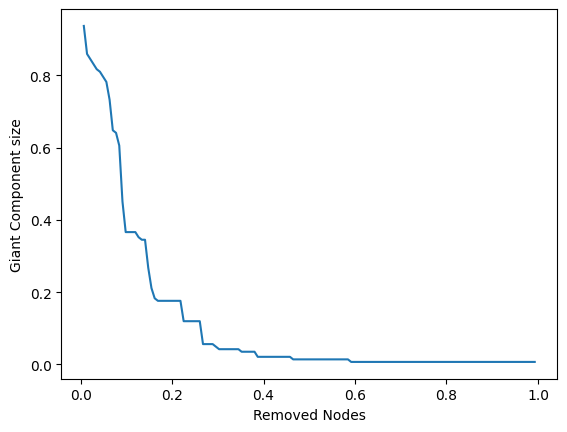

In [63]:
h = g.copy()  # Анхны графын хуулбарыг үүсгэх (эх графыг өөрчлөхгүй байлгахын тулд)
rn, comps = dismantle(h, get_sorted_nodes, score=nx.degree)  # Графаас зангилаануудыг зэргээр нь эрэмбэлж устгах
plot_dismantle(rn, comps)  # Задралын процессыг графикаар дүрслэх

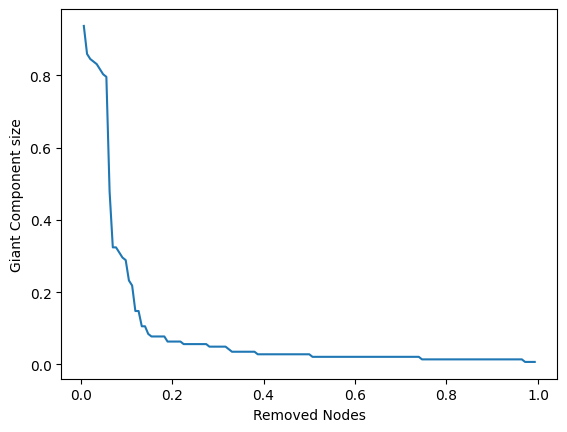

In [64]:
h = g.copy()  # Анхны графын хуулбарыг өөрчлөхгүйн тулд хуулбар үүсгэх
rn, comps = dismantle(h, get_sorted_nodes, score=nx.betweenness_centrality)  # Зангилаануудыг 'betweenness centrality'-ээр эрэмбэлж устгах
plot_dismantle(rn, comps)  # Задралын процессыг графикаар дүрслэх

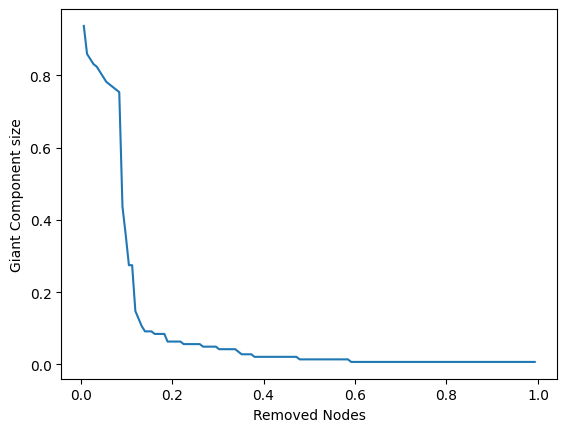

In [65]:
h = g.copy()  # Анхны графын хуулбарыг үүсгэх (эх графыг өөрчлөхгүй байлгахын тулд)
rn, comps = dismantle(h, get_sorted_nodes, score=nx.harmonic_centrality)  # Зангилаануудыг 'harmonic centrality'-ээр эрэмбэлж устгах
plot_dismantle(rn, comps)  # Задралын процессыг графикаар дүрслэх